In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from scipy import stats
from numpy import sqrt 
from numpy import sum as arraysum

Boston = pd.read_csv('Boston.csv')

C:\Users\AhmadAnbarje\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [3]:
print("Number of predictors: ", Boston.shape[1])
for col in Boston.columns:
    print(col)

Number of predictors:  15
Unnamed: 0
crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
black
lstat
medv


In [4]:
print(Boston.describe())

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

In [5]:
print("Number of data points:", Boston.shape[0])

Number of data points: 506


In [6]:
Boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0



Plot lstat:



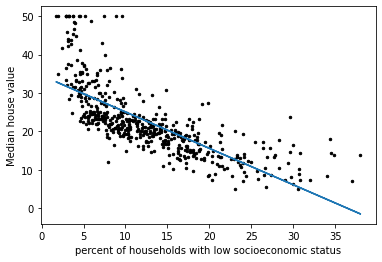

-0.737662726174015

Plot rm:



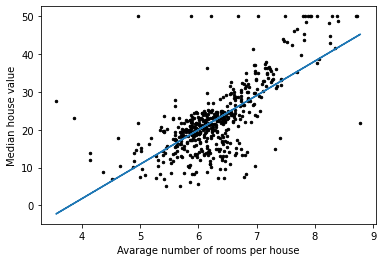

0.6953599470715396

Plot age:



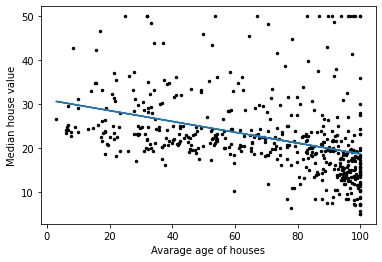

-0.3769545650045963


In [7]:
def myfunc(x):
  return slope * x + intercept

lstat_list = Boston["lstat"].tolist()
rm_list = Boston["rm"].tolist()
age_list = Boston["age"].tolist()
medv_list = Boston["medv"].tolist()

#LSTAT

slope, intercept, r, p, std_err = stats.linregress(lstat_list, medv_list)
mymodel = list(map(myfunc, lstat_list))

plt.xlabel("percent of households with low socioeconomic status")
plt.ylabel("Median house value")

plt.scatter(lstat_list, medv_list, color = 'black', s = 6)
plt.plot(lstat_list, mymodel)
print("\nPlot lstat:\n")
plt.show()
print(r)

#RM

slope, intercept, r, p, std_err = stats.linregress(rm_list, medv_list)
mymodel = list(map(myfunc, rm_list))

plt.xlabel("Avarage number of rooms per house")
plt.ylabel("Median house value")

plt.scatter(rm_list, medv_list, color = 'black', s = 6)
plt.plot(rm_list, mymodel)
print("\nPlot rm:\n")
plt.show()
print(r)

#Age of houses

slope, intercept, r, p, std_err = stats.linregress(age_list, medv_list)
mymodel = list(map(myfunc, age_list))

plt.xlabel("Avarage age of houses")
plt.ylabel("Median house value")

plt.scatter(age_list, medv_list, color = 'black', s = 6)
plt.plot(age_list, mymodel)
print("\nPlot age:\n")
plt.show()
print(r)

In [8]:
#Perform simple linear regressions lstat

# apply linear regrission - first way
# This array should be two dimentional to make the fitting of model
# x = np.array(lstat_list).reshape((-1, 1))
# y = np.array(medv_list)
# model = LinearRegression().fit(x, y)

#print(result_lstat.pvalues["lstat"])
#result_lstat.params["Intercept"]

# apply linear regrission - second way
mod = smf.ols('medv ~ lstat', data=Boston)
result_lstat = mod.fit()
print(result_lstat.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        16:37:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

[//]: # (Interpret lstat)
[//]: # (A linear graph can be written as y = ax + b OR in statistics y = B0 + B1X + E)
[//]: # (In statistics y = B0 + B1X + E)

[//]: # (Squared R-Squared and Adjusted R-Squared describes how well the linear regression model fits the data points)
[//]: # (high R-Squared value means that many data points are close to the linear regression function line)
[//]: # (A low R-Squared value means that the linear regression function line does not fit the data well.)



## 1.2.2 Interpretation of perform simple linear regressions, fit a simple linear regression model [lstat]
### Result:
`Coefficient of lstat (slope,marginal effect, a, B1):` **-0.9500493537579922**  
Means if we increase the x unit by **1**, the y unit will decrese by that value,
So we can see how the slope goes down in plot lstat. Also it means that the lstat has very big negative effect on medv.  
`Coefficient of intercept (b, B0):` **34.55384087938308**  
Means when x = **0**, y unit is starting at that value, also we can notice that in plot lstat.  
### Is that a good model?
**The rule of null hypothesis testing(H0):**  
> By applying null hypothesis testing(H0), by testing if the true coefficient of age and the intercept is equal to zero.
We can reject the null hypothesis if P-value is lower than 0.05, so it conclude that it exist a relationship.

`The p-value of the coefficent slope(lstat):` **5.081103394386205e-88**  
Means that there is about **0%** chance that the true coefficient of lstat is zero, so we can conclude a statistically significant relationship between lstat and medv.  

**The rule of R-Squared:**  
>If R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size, - if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size, - if R-squared value r > 0.7 this value is generally considered strong effect size

`R-Squared:` **0.5441462975864799**  
Means that the linear regression function line does fit the data **moderately**. So the model explains about **50%** of variation within the data.

Note:It is uncommon to interpret the P-value of the intercept because that value is used to adjust(up or down) the regression function's ability to predict more accurately.

In [9]:
#Perform simple linear regressions rm

# apply linear regrission - first way
# This array should be two dimentional to make the fitting of model
# x = np.array(rm_list).reshape((-1, 1))
# y = np.array(medv_list)
# model = LinearRegression().fit(x, y)

# apply linear regrission - second way
mod = smf.ols('medv ~ rm', data=Boston)
result_rm = mod.fit()
print(result_rm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        16:37:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

[//]: # (A linear graph can be written as y = ax + b OR in statistics y = B0 + B1X + E)
[//]: # (In statistics y = B0 + B1X + E)

[//]: # (Squared R-Squared and Adjusted R-Squared describes how well the linear regression model fits the data points)
[//]: # (high R-Squared value means that many data points are close to the linear regression function line)
[//]: # (A low R-Squared value means that the linear regression function line does not fit the data well.)



## 1.2.2 Interpretation of perform simple linear regressions, fit a simple linear regression model [rm]
### Result:
`Coefficient of rm (slope,marginal effect, a, B1):` **9.10210898118031**  
Means if we increase the x unit by **1**, the y unit will increase by that value,
So we can see how the slope goes down in plot rm. Also it means that the rm has big positive effect on medv.  
`Coefficient of intercept (b, B0):` **-34.67062077643859**  
Means when x = **0**, y unit is starting at that value, also we can notice that in plot rm.  
### Is that a good model?
**The rule of null hypothesis testing(H0):**  
> By applying null hypothesis testing(H0), by testing if the true coefficient of age and the intercept is equal to zero.
We can reject the null hypothesis if P-value is lower than 0.05, so it conclude that it exist a relationship.

`The p-value of the coefficent slope(rm):` **2.4872288710079515e-74**  
Means that there is about **0%** chance that the true coefficient of rm is zero, so we can conclude a statistically significant relationship between rm and medv.

**The rule of R-Squared:**  
>If R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size, - if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size, - if R-squared value r > 0.7 this value is generally considered strong effect size

`R-Squared:` **0.483525455991334**  
Means that the linear regression function line has **little weakness** for fitting the data. And the model explains about **40%** of variation within the data.

Note:It is uncommon to interpret the P-value of the intercept because that value is used to adjust(up or down) the regression function's ability to predict more accurately.

In [10]:
#Perform simple linear regressions age

# This array should be two dimentional to make the fitting of model
# x = np.array(age_list).reshape((-1, 1))
# y = np.array(medv_list)
# model = LinearRegression().fit(x, y)

# Second way
mod = smf.ols('medv ~ age', data=Boston)
result_age = mod.fit()
print(result_age.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.57e-18
Time:                        16:37:28   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

[//]: # (A linear graph can be written as y = ax + b OR in statistics y = B0 + B1X + E)
[//]: # (In statistics y = B0 + B1X + E)

[//]: # (Squared R-Squared and Adjusted R-Squared describes how well the linear regression model fits the data points)
[//]: # (high R-Squared value means that many data points are close to the linear regression function line)
[//]: # (A low R-Squared value means that the linear regression function line does not fit the data well.)



## 1.2.2 Interpretation of perform simple linear regressions, fit a simple linear regression model [age]
### Result:
`Coefficient of age (slope,marginal effect, a, B1):` **-0.12316272123567974**  
increase the x unit by **1**, the y unit will decrese by that value,
so we can see how the slope goes down in plot age. Also it means that the age has small negative effect on medv.  
`Coefficient of intercept (b, B0):` **30.97867776261805**  
Means when x = **0**, y unit is starting at that value, also we can notice that in plot age.  
### Is that a good model?
**The rule of null hypothesis testing(H0):**  
> By applying null hypothesis testing(H0), by testing if the true coefficient of age and the intercept is equal to zero.
We can reject the null hypothesis if P-value is lower than 0.05, so it conclude that it exist a relationship.

`The p-value of the coefficent slope(age):` **1.5699822091880774e-18**  
Means that there is about **0%** chance that the true coefficient of age is zero, so we can conclude a statistically significant relationship between age and medv.  

**The rule of R-Squared:**  
>If R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size, - if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size, - if R-squared value r > 0.7 this value is generally considered strong effect size

`R-Squared:` **0.14209474407780465**  
Means that the linear regression function line does not fit the data well and it is **very weak**. and the model explains just about **10%** of variation within the data.

Note:It is uncommon to interpret the P-value of the intercept because that value is used to adjust(up or down) the regression function's ability to predict more accurately.

In [11]:
#lstat Confidence_interval
arr_result_lstat = result_lstat.conf_int(alpha=0.05, cols=None)
first_value_CI_lstat = arr_result_lstat[0][1]
second_value_CI_lstat = arr_result_lstat[1][1]
print(arr_result_lstat)

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


[//]: # (The confidence interval is defined by a lower bound and an upper bound)
[//]: # (This gives us a range of values that the true parameter is likely to be between)

## 1.2.2 Interpretation of perform simple linear regressions, confidence interval for the coefficient [lstat]
### Result:
>If **0** is outside our 95% confidence interval, then it exists a statistically significant relationship.

**95%** confidence interval for the slope coefficient is between **[-1.026148199520762, -0.8739505079952223]**  
So again, there is statistically significant relationship between them.

In [12]:
#rm Confidence_interval
arr_result_rm = result_rm.conf_int(alpha=0.05, cols=None)
first_value_CI_rm = arr_result_rm[0][1]
second_value_CI_rm = arr_result_rm[1][1]
print(arr_result_rm)

                   0          1
Intercept -39.876641 -29.464601
rm          8.278855   9.925363


[//]: # (The confidence interval is defined by a lower bound and an upper bound)
[//]: # (This gives us a range of values that the true parameter is likely to be between)

## 1.2.2 Interpretation of perform simple linear regressions, confidence interval for the coefficient [rm]
### Result:
>If **0** is outside our 95% confidence interval, then it exists a statistically significant relationship.

**95%** confidence interval for the slope coefficient is between **[8.278855039567683, 9.925362922792937]**  
So again, there is statistically significant relationship between them.

In [13]:
#age Confidence_interval
arr_result_age = result_age.conf_int(alpha=0.05, cols=None)
first_value_CI_age = arr_result_age[0][1]
second_value_CI_age = arr_result_age[1][1]
print(arr_result_age)

                   0          1
Intercept  29.015752  32.941604
age        -0.149647  -0.096679


[//]: # (The confidence interval is defined by a lower bound and an upper bound)
[//]: # (This gives us a range of values that the true parameter is likely to be between)

## 1.2.2 Interpretation of perform simple linear regressions, confidence interval for the coefficient [age]
### Result:
>If **0** is outside our 95% confidence interval, then it exists a statistically significant relationship.

**95%** confidence interval for the slope coefficient is between **[-0.14964692568745713, -0.09667851678390235]**  
So again, there is statistically significant relationship between them.

In [14]:
import numpy

def predictY(x_point):
  return b1 * x_point + b0

x = Boston["lstat"]
y = Boston["medv"]

b1, b0, r_value, p_value, std_err = stats.linregress(x, y)

y_points_linear_line = b0 + b1 * x

input_x_points = [5,10,15]
for x_point in input_x_points:
    predicted_y_point = predictY(x_point)
    
#     std_err = sqrt((predicted_y_point - 11)/len(y)-2)
#     print(std_err)

    # estimate stdev of the predicted value
    #sum_errs1 = arraysum(( y - y_points_linear_line)**2)
    #stdev1 = sqrt(1/(len(y)-2) * sum_errs)
    
    sum_errs = arraysum((y_points_linear_line - y)**2)
    stdev_OR_StandardErrorOfEstimate = sqrt(sum_errs/(len(y)-2))
    
#We will use the significance level of 95%, which is 1.96 standard deviations
    interval = 1.96 * stdev_OR_StandardErrorOfEstimate
#     upp = b1 + 2 * std_err
#     print(upp)
    lower, upper = predicted_y_point - interval, predicted_y_point + interval
    
    print("Result of prediction: ", predicted_y_point, (lower, upper))
#     print('Prediction Interval: %.3f' % interval)
#     print("Result of stdev: ",stdev_OR_StandardErrorOfEstimate)

# Uncomment these to get the drawing plots.
#     plt.scatter(x, y)
#     plt.plot(x, y_points_linear_line, color='red')
#     plt.errorbar(x_point, predicted_y_point, yerr=interval, color='black', fmt='o')
#     plt.show()

Result of prediction:  29.80359411059315 (17.620703716012933, 41.986484505173365)
Result of prediction:  25.053347341803196 (12.87045694722298, 37.236237736383416)
Result of prediction:  20.30310057301324 (8.120210178433023, 32.48599096759345)


## 1.2.3 Interpretation of perform simple linear regressions, predict the medv.
### Result:
For calculating the `prediction interval` we need to calculate the predicted point and the interval, then applying this equation as I mentioned in the code:
```python
    lower, upper = predicted_y_point - interval, predicted_y_point + interval
````
Now for calculating the `predictied point` we need to pass an x point in our example(5, 10, 15) and applying a linear equation **y = b1*x+b0**, or as it shows in the code:
```python
def predictY(x_point):
  return b1 * x_point + b0
````
The last missing variable  which is `interval` and that could be calculated by the equation **Interval = 1.96 * standard error of estimate(standard deviation)** or as it shows in code:
```python
    interval = 1.96 * stdev_OR_StandardErrorOfEstimate
```
>95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central limit theorem, this number is therefore used in the construction of approximate 95% prediction intervals

Lastly we can calculate `standar error of estimate` and `sum of errors` by these two line as it shows in code:
```python
    sum_errs = arraysum((y_points_linear_line - y)**2)
    stdev_OR_StandardErrorOfEstimate = sqrt(sum_errs/(len(y)-2))
```

As we can see the expected value of `x = 5`, **expected y = 29.8** And 95% likelihood that the true value is between **[17.6, 41.9]**  
As we can see the expected value of `x = 10`, **expected y = 25** And 95% likelihood that the true value is between **[12.8, 37.2]**  
As we can see the expected value of `x = 15`, **expected y = 20.3** And 95% likelihood that the true value is between **[8.1, 32.4]**

In [15]:
def predict(x_point):
  return b1 * x_point + b0

x = Boston["rm"]
y = Boston["medv"]

b1, b0, r_value, p_value, std_err = stats.linregress(x, y)

y_points_linear_line = b0 + b1 * x

predict_point = [5,6.5,8]

for predicted_value in predict_point:
    predicted_y = predict(predicted_value)

    # estimate stdev of the predicted value
    sum_errs = arraysum((y_points_linear_line - y)**2)
    stdev_OR_StandardErrorOfEstimate = sqrt(sum_errs/(len(y)-2))

    #We will use the significance level of 95%, which is 1.96 standard deviations
    interval = 1.96 * stdev_OR_StandardErrorOfEstimate
    lower, upper = predicted_y - interval, predicted_y + interval
    
    print("Result of prediction:", predicted_y, (lower, upper))
#     print('Prediction Interval: %.3f' % interval)
#     print("Result of stdev: ",stdev)

# Uncomment these to get the drawing plots.
#     plt.scatter(x, y)
#     plt.plot(x, y_points_linear_line, color='red')
#     plt.errorbar(predicted_value, predicted_y, yerr=interval, color='black', fmt='o')
#     plt.show()

Result of prediction: 10.839924129462986 (-2.1277489799791116, 23.807597238905082)
Result of prediction: 24.493087601233455 (11.525414491791357, 37.46076071067555)
Result of prediction: 38.146251073003924 (25.17857796356183, 51.11392418244602)


## 1.2.3 Interpretation of perform simple linear regressions, predict the rm.
### Result:
By applying the same equations from the previous interpretation:

As we can see the expected value of `x = 5`, **expected y = 10.8** And 95% likelihood that the true value is between **[-2.1, 23.8]**  
As we can see the expected value of `x = 6.5`,  **expected y = 24.4** And 95% likelihood that the true value is between **[11.5, 37.4]**  
As we can see the expected value of `x = 8`,  **expected y = 38.1** And 95% likelihood that the true value is between **[25.1, 51.1]**

In [16]:
def predict(x_point):
  return b1 * x_point + b0

x = Boston["age"]
y = Boston["medv"]

b1, b0, r_value, p_value, std_err = stats.linregress(x, y)

y_points_linear_line = b0 + b1 * x

predict_point = [25,50,75]

for predicted_value in predict_point:
    predicted_y = predict(predicted_value)

    # estimate stdev of the predicted value
    sum_errs = arraysum((y_points_linear_line - y)**2)
    stdev_OR_StandardErrorOfEstimate = sqrt(sum_errs/(len(y)-2))

    #We will use the significance level of 95%, which is 1.96 standard deviations
    interval = 1.96 * stdev_OR_StandardErrorOfEstimate
    lower, upper = predicted_y - interval, predicted_y + interval
    
    print("Result of prediction: ", predicted_y, (lower, upper))
#     print('Prediction Interval: %.3f' % interval)
#     print("Result of stdev: ",stdev)

# Uncomment these to get the drawing plots.
#     plt.scatter(x, y)
#     plt.plot(x, y_points_linear_line, color='red')
#     plt.errorbar(predicted_value, predicted_y, yerr=interval, color='black', fmt='o')
#     plt.show()

Result of prediction:  27.899609731726052 (11.186500251723881, 44.61271921172822)
Result of prediction:  24.820541700834056 (8.107432220831885, 41.53365118083623)
Result of prediction:  21.741473669942064 (5.028364189939893, 38.454583149944234)


## 1.2.3 Interpretation of perform simple linear regressions, predict the age.
### Result:
By applying the same equations from the previous interpretation:

As we can see the expected value of `x = 25`, **expected y = 27.8** And 95% likelihood that the true value is between **[11.1, 44.6]**  
As we can see the expected value of `x = 50`,  **expected y = 24.8** And 95% likelihood that the true value is between **[8.1,  41.5]**  
As we can see the expected value of `x = 75`,  **expected y = 21.7** And 95% likelihood that the true value is between **[5, 38.4]**

In [17]:
mod = smf.ols('medv ~ lstat + rm + age', data=Boston)
result_lstat_rm_age = mod.fit()
print(result_lstat_rm_age.summary())

# print(result_lstat_rm_age.pvalues["lstat"])
# print(result_lstat_rm_age.pvalues["rm"])
# print(result_lstat_rm_age.pvalues["age"])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):          1.20e-110
Time:                        16:37:29   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1753      3.182     -0.369      0.7

[//]: # (A linear graph can be written as yi = 0 + 1xi1 + 2xi2 + ... pxip + i for i = 1,2, ... n.)

[//]: # (Squared R-Squared and Adjusted R-Squared describes how well the linear regression model fits the data points)
[//]: # (high R-Squared value means that many data points are close to the linear regression function line)
[//]: # (A low R-Squared value means that the linear regression function line does not fit the data well.)



## 1.2.4 Interpretation of perform multiple linear regressions [lstat, rm, age] as independent variable, and [medv] as dependent variable
### Result:
For the cofficents the rule says:
>Each coefficient is interpreted as the estimated change in y corresponding to one unit change in a variable when all other variables are held constant

`Coefficient of lstat:` **-0.6685** has negative effect to medv when the other independent variables are constant.  
`Coefficient of rm:` **5.0191** has positive effect to medv when the other independent variables are constant.  
`Coefficient of age:` **0.0091** has almost no effect to medv when the other independent variables are constant.

### Is that a good model?
**The rule of null hypothesis testing(H0):**  
> By applying null hypothesis testing(H0), by testing if the true coefficient of age and the intercept is equal to zero.
We can reject the null hypothesis if P-value is lower than 0.05, so it conclude that it exist a relationship.

`The p-value of the coefficent slope(lstat):` **1.4374733505476923e-30**  
Means that there is about **0%** chance that the true coefficient of lstat is zero, so we can **conclude a relationship between lstat and medv** .  
`The p-value of the coefficent slope(rm):` **1.5056125785381668e-25**  
Means that there is about **0%** chance that the true coefficient of lstat is zero, so we can **conclude a relationship between rm and medv** .  
`The p-value of the coefficent slope(age):` **0.4179576799608147**  
Here p-value > 0.05 that is not statistically significant and indicates strong evidence for the null hypothesis. so we **can not conclude a relationship between age and medv.**  

**The rule of R-squared in multiple linear regrission:**  
>There is a problem with R-squared if we have more than one explanatory variable.
R-squared will almost always increase if we add more variables, and will never decrease.
This is because we are adding more data points around the linear regression function. So we risk to falsely conclude that the linear regression function is a good fit. Adjusted R-squared adjusts for this problem.

**The rule of R-squared in multiple linear regrission:**  
>If R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size, - if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size, - if R-squared value r > 0.7 this value is generally considered strong effect size

`Adj. R-squared:` **0.637**  
Means that the multiple linear regression function moderately fit the data. And the model explains about **60%** of variation within the data.

Note: Here we did not mention multicollinearity, or VIFs values.

In [18]:
mod = smf.ols('medv ~ crim  + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat ', data=Boston)
result_lstat_rm_age = mod.fit()
print(result_lstat_rm_age.summary())

# print(result_lstat_rm_age.pvalues["lstat"])
# print(result_lstat_rm_age.pvalues["rm"])
# print(result_lstat_rm_age.pvalues["age"])

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 21 Feb 2022   Prob (F-statistic):          6.72e-135
Time:                        16:37:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

[//]: # (A linear graph can be written as yi = 0 + 1xi1 + 2xi2 + ... pxip + i for i = 1,2, ... n.)

[//]: # (Squared R-Squared and Adjusted R-Squared describes how well the linear regression model fits the data points)
[//]: # (high R-Squared value means that many data points are close to the linear regression function line)
[//]: # (A low R-Squared value means that the linear regression function line does not fit the data well.)


## 1.2.4 Interpretation of perform multiple linear regressions [all available predictors] as independent variables, and [medv] as dependent variable
### Result:

**The rule of null hypothesis testing(H0):**  
> By applying null hypothesis testing(H0), by testing if the true coefficient of age and the intercept is equal to zero.
We can reject the null hypothesis if P-value is lower than 0.05, so it conclude that it exist a relationship.

As we can see from p-values of all predictors:  
There is statically siginificant relationship for all predictors with excluding **indus, age**.  

**The rule of R-squared in multiple linear regrission:**  
>There is a problem with R-squared if we have more than one explanatory variable.
R-squared will almost always increase if we add more variables, and will never decrease.
This is because we are adding more data points around the linear regression function. So we risk to falsely conclude that the linear regression function is a good fit. Adjusted R-squared adjusts for this problem.

**The rule of R-squared in multiple linear regrission:**  
>If R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size, - if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size, - if R-squared value r > 0.7 this value is generally considered strong effect size

`Adj. R-squared:` **0.734**  
Means that the multiple linear regression function strongly fit the data. And the model explains about **70%** of variation within the data.

Note: Here we did not mention multicollinearity, or VIFs values.

In [19]:
import pandas as pd
import numpy as np

df = Boston.drop(columns=['Unnamed: 0'])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))


# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

C:\Users\AhmadAnbarje\AppData\Local\Temp\ipykernel_12172\2201356976.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
zn,-0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
indus,0.41,-0.53,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
chas,-0.06,-0.04,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nox,0.42,-0.52,0.76,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rm,-0.22,0.31,-0.39,0.09,-0.30,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0.35,-0.57,0.64,0.09,0.73,-0.24,nan,nan,nan,nan,nan,nan,nan,nan
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,nan,nan,nan,nan,nan,nan,nan
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,nan,nan,nan,nan,nan,nan
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,nan,nan,nan,nan,nan


## 1.2.4 Interpretation of  correlation between the predictors
### Result:
correlation matrix is something very important when using multiple regrission, because one key we need to think about is:   
>`Multicollinearity:` occurs when two or more independent variables are highly correlated with one another in a regression model.  This means that an independent variable can be predicted from another independent variable in a regression model.  

Because multicollinearity reduces the estimated coefficients, which weakens the statistical power of regression model.  

`First usecase:`  
We have used multiple liner regrission earlier, with **lstat, rm, age** predictors.  
The coorelation between **lstat** and **rm**: **-0.61** which indecates good negative correlation between them. And that will affect our multiple linear regrission. Which reduces the accuracy of estimated coefficients.  
Also the coorelation between **lstat** and **age**: **0.60**, which indecates good positive correlation between them.  
Also the coorelation between **rm** and **age**:  **-0.24**, which indecates small positive correlation between them.

`Second usecase:`  
We have used multiple liner regrission earlier, with **all** predictors.
We can notice the very high correlation between **rad** and **tax**, also **indus** and **nox** .   
Also the negative high correlation between **age** and **dis** .  
Also that there is no correlation between **nox** and the other predictors
And the high correlation between **indus** and the other predictors.



In [20]:
from sklearn import linear_model

X = Boston[['lstat', 'rm']]
y = Boston['medv']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictions = [regr.predict([[5, 5]])[0], regr.predict([[10, 5]])[0], regr.predict([[15, 5]])[0],
               regr.predict([[5, 6.5]])[0], regr.predict([[10, 6.5]])[0], regr.predict([[15, 6.5]])[0],
               regr.predict([[5, 8]])[0], regr.predict([[10, 8]])[0], regr.predict([[15, 8]])[0]
              ]

# b1 = regr.coef_[0]
# b2 = regr.coef_[1]
# b0 = regr.intercept_

standard_error_of_estimate = 5.619459183673469

for item in predictions:
    interval = 1.96 * standard_error_of_estimate
    lower, upper = item - interval, item + interval
    print("Fit: ", item, "Lower:",lower,"Upper:", upper)

Fit:  20.903875438587587 Lower: 9.889735438587588 Upper: 31.918015438587588
Fit:  17.69208376736694 Lower: 6.677943767366942 Upper: 28.706223767366943
Fit:  14.480292096146298 Lower: 3.466152096146299 Upper: 25.494432096146298
Fit:  28.546057415092395 Lower: 17.531917415092394 Upper: 39.5601974150924
Fit:  25.33426574387175 Lower: 14.32012574387175 Upper: 36.34840574387175
Fit:  22.122474072651105 Lower: 11.108334072651106 Upper: 33.136614072651106
Fit:  36.18823939159721 Lower: 25.17409939159721 Upper: 47.202379391597205
Fit:  32.976447720376555 Lower: 21.962307720376558 Upper: 43.99058772037655
Fit:  29.764656049155914 Lower: 18.750516049155912 Upper: 40.778796049155915


C:\Users\AhmadAnbarje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AhmadAnbarje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AhmadAnbarje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AhmadAnbarje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AhmadAnbarje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not

In [21]:
# from sklearn import linear_model

# X = Boston[['lstat', 'rm']]
# y = Boston['medv']

# regr = linear_model.LinearRegression()
# regr.fit(X, y)

# predicted_medv_1 = regr.predict([[5, 5]])

# y_points_linear_line = regr.intercept_ + (regr.coef_[0] * 5) + (regr.coef_[1] * 5)


# stdev_OR_StandardErrorOfEstimate = sqrt(sum_errs/(len(y)-2))
# # stdev_OR_StandardErrorOfEstimate = 5.619459183673469
# print(stdev_OR_StandardErrorOfEstimate)
# interval = 1.96 * stdev_OR_StandardErrorOfEstimate

# # print(interval)

# lower, upper = 20.90387544 - interval, 20.90387544 + interval
    
# print("Result of prediction: ", 20.90387544, (lower, upper))


# print(regr.coef_[0])
# print(regr.coef_[1])
# print(predicted_medv_1)

In [22]:
# mod = smf.ols('medv ~ lstat + rm ', data=Boston)
# result_lstat_rm_age = mod.fit()
# print(result_lstat_rm_age.summary())